In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import torch

from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans, AffinityPropagation, SpectralClustering, OPTICS
from sklearn import metrics

warnings.filterwarnings("ignore")

In [54]:
hm8_db = pd.read_csv('hm8.csv', index_col='item_id')
embedding_db = pd.read_csv('embedding.csv', index_col='item_id')

old_indexes = hm8_db.index
new_indexes = embedding_db.index

item_ids = list()
for i in old_indexes:
    if i in new_indexes:
        item_ids.append(i)

embedding_db = embedding_db.loc[item_ids]
hm8_db = hm8_db.loc[item_ids]

In [3]:
X = embedding_db.values
X_embedded = TSNE(n_components=2).fit_transform(X)

(12600, 2)

In [30]:
# I have tried clustering methods: Agglomerative, DBSCAN, Kmeans, Spectral, OPTICS, AffinityPropagation 
# with various hyperparameters and evaluated them according to 'silhouette_score'.

clustering = SpectralClustering(n_clusters=12, random_state=1, affinity='nearest_neighbors').fit(X)

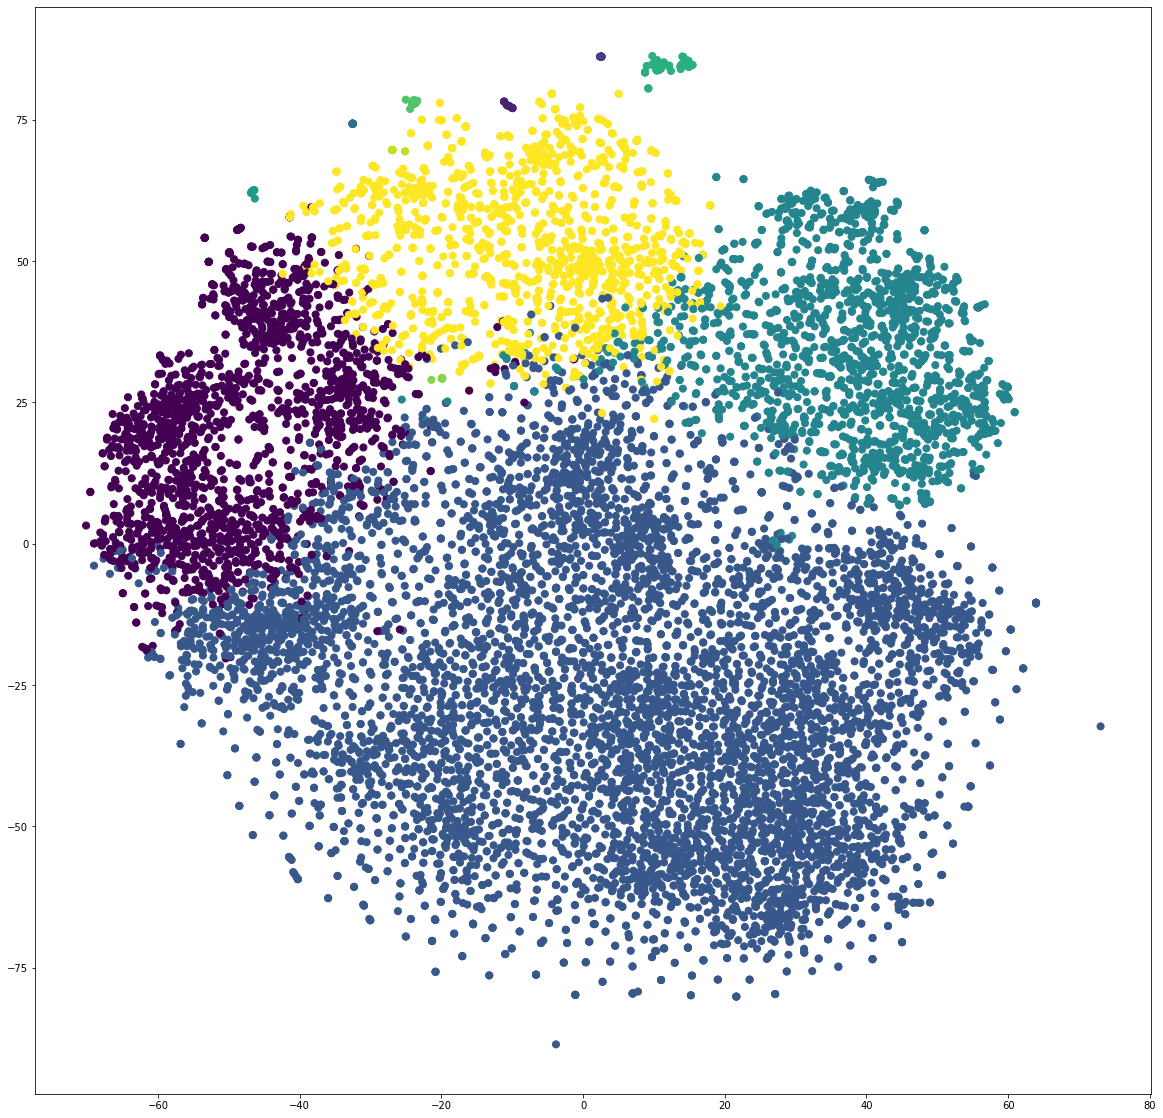

In [31]:
plt.figure(figsize=(20, 20))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=clustering.labels_, s=50, cmap='viridis')

In [32]:
metrics.silhouette_score(X, clustering.labels_)

0.12407583103228141

In [59]:
hm8_db['cluster'] = clustering.labels_

In [66]:
db = pd.get_dummies(hm8_db, columns=['cluster'])
db.to_csv('hm9.csv')